# Assignment 1 - Decision Trees and Clustering Techniques

## *Aprendizagem Computacional - MEI | Computação Neuronal e Sistemas Difusos - MIEB*

### by Catarina Silva and Marco Simões

_

This assignment will assess the students knowledge on the following Machine Learning topics:
- Decision Trees
- Clustering Techniques

The assignment is split into two sub-assignments: 1-a) Decision Trees (first week) and 1-b) Clustering Techniques (second week).

Students should implement their solutions and answering the questions directly in the notebooks, and submit both files together in Inforestudante before the deadline: *06/10/2021*

## Conditions: 
- *Groups:* two elements of the same PL class
- *Duration:* 2 weeks
- *Workload:* 8h per student
 

 ***
## Group Identification:
__Student Number:__ 2021163965 __Student Name:__ Dániel Grimm <p>
__Student Number:__ 2021189749 __Student Name:__ Anthony Laperche
 ***

# Assignment 1 - b) Clustering techniques


Consider the folowing four datasets:

- `Aggregation`: A. Gionis, H. Mannila, and P. Tsaparas, Clustering aggregation. ACM Transactions on Knowledge Discovery from Data (TKDD), 2007. 1(1): p. 1-30.
- `Compound`: C.T. Zahn, Graph-theoretical methods for detecting and describing gestalt clusters. IEEE Transactions on Computers, 1971. 100(1): p. 68-86.
- `R15`: C.J. Veenman, M.J.T. Reinders, and E. Backer, A maximum variance cluster algorithm. IEEE Trans. Pattern Analysis and Machine Intelligence, 2002. 24(9): p. 1273-1280.
- `Spiral`: H. Chang and D.Y. Yeung, Robust path-based spectral clustering. Pattern Recognition, 2008. 41(1): p. 191-203.

They are composed by matrixes of several rows and three columns: the first two correspond to the xy-coordinates of the point, and the thrid correspond to the index of the cluster they bellong to (ranging from `0` to `nclusters-1`). Each dataset have a different number of rows and clusters.


***
### Ex. 1

Load the datasets into memory and extract, for each dataset, the number of true clusters in the data. You should populate de `datasets` and `nclusters` arrays so they end up with four cells, one for each dataset, with the dataframes (`shape=[nsamples, d=2]` and the number of clusters, respectively. Then, create a figure with four scatter plots showing the spatial distribution of the points in each dataset. You might find useful the following functions: `iloc`, from `pandas`; `subplots`, `scatter` and `set_title` from matplotlib's `pyplot`. The final result should be similar to the following image:

![scatters](https://www.dropbox.com/s/h7xf9mlm2dwp158/cluster_scatters.png?dl=1)

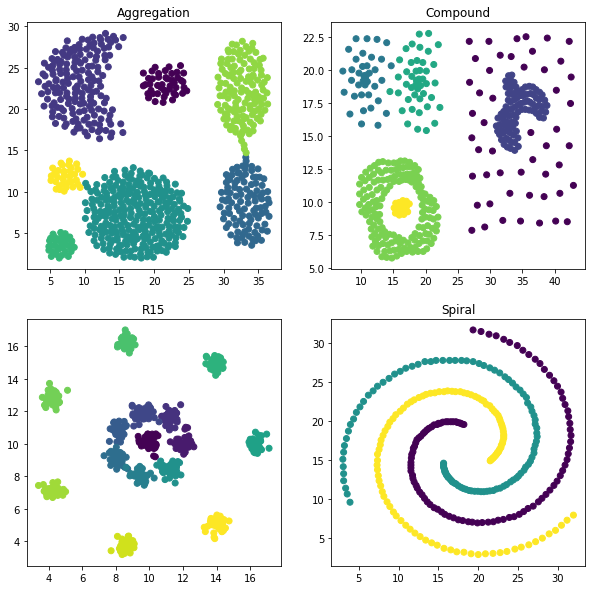

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
... # TODO add extra imports if needed
# load data
N_DATASETS = 4

dataset_names = ['Aggregation', 'Compound', 'R15', 'Spiral']
dataAgregation = pd.read_csv('Aggregation.txt',sep='\s+',header=None)
dataAgregation = pd.DataFrame(dataAgregation)
dataCompound = pd.read_csv('Compound.txt',sep='\s+',header=None)
dataCompound = pd.DataFrame(dataCompound)
dataSpiral = pd.read_csv('Spiral.txt',sep='\s+',header=None)
dataSpiral = pd.DataFrame(dataSpiral)
dataR15 = pd.read_csv('R15.txt',sep='\s+',header=None)
dataR15 = pd.DataFrame(dataR15)

datasets = [dataAgregation,dataCompound,dataR15,dataSpiral]
nclusters = [max(dataAgregation[2]),max(dataCompound[2]),max(dataR15[2]),max(dataSpiral[2])]
# Load datasets data and plot them into as scatter plots in a 2x2 figure of subplots
fig, axes = plt.subplots(2,2, figsize=[10,10])

i=0
for x in range(0,2):
    for y in range(0,2):
        axes[x,y].set_title(dataset_names[i])
        axes[x,y].scatter(datasets[i][0],datasets[i][1],c=datasets[i][2])
        i+=1
    

***
### Ex. 2

Create a function `calc_dist( xi, xj, dist_type )` that, given two feature vectors (`xi` and `xj`) and the `type of distance` metric to use (`dist_type`, with possible values: `euclidean, manhattan, chebychev`), computes and returns the correspondent distance value between the two feature vectors. **NOTE:** You may not resort to third-party predefined distance functions, such as the ones provided by the `scipy.spatial.distance` module. You must compute the distance from the data, using only simple mathematical and algebric functions, such as `sum, sqrt, abs` and so on.

In [3]:
from math import sqrt

def calc_dist( xi, xj, dist_type ):
    
    if len(xi) != len (xj):    
        return 0
        
    length = len(xi)

    def euclidean_distance(xi, xj):
        return sqrt(sum([(xi[k] - xj[k])**2 for k in range(length)]))

    def manhattan_distance(xi, xj):
        return sum([abs(xi[k] - xj[k]) for k in range(length)])
    
    def chebysev_distance(xi, xj):
        return max([abs(xi[k] - xj[k]) for k in range(length)])
    
    if dist_type == 'manhattan':
        return manhattan_distance(xi, xj)
    elif dist_type == 'euclidean':
        return euclidean_distance(xi, xj)
    elif dist_type == 'chebychev':
        return chebysev_distance(xi, xj)
    else:
        return 0
        
    

***
### Ex. 3
Create a function `gen_random_centroids( n, min_coords, max_coors )` that generates `n` random points within the coordinate limits provided in the arrays `min_coords` and `max_coords` (both of `shape = [1,d]`, with `d` being the number of coordinates of each point - in our datasets, `d=2`). The function must output a matrix of shape `[n, d]`, where each row contains the coordinates of a centroid.

In [4]:
def gen_random_centroids( n, min_coords, max_coords ):
    
    point_elements = []
    
    for k in range(len(min_coords)):
        point_elements.append([np.random.uniform(min_coords[k], max_coords[k]) for i in range(n)])
    return np.array(list(zip(*point_elements)))
   

In [5]:
# example
print(gen_random_centroids(3, [2, -3], [12, 5]))

# Example Output: 
# - Since the values are random, your output might/should be different. Only the shape should be the same. 
# - Notice the values are within the range limits provides by argument to the fucntion.

'''
[[10.93543569  3.45456041]
 [11.6848827   3.90977382]
 [ 5.15555478 -1.78510517]]
'''

[[ 3.7513172   1.03565532]
 [11.9549075   2.3270712 ]
 [ 7.00687716 -0.92090285]]


'\n[[10.93543569  3.45456041]\n [11.6848827   3.90977382]\n [ 5.15555478 -1.78510517]]\n'

***
### Ex. 4
Create a function `label_data( data, centroids, dist_type='euclidean' )` that attributes a cluster label for each data record based on its distance to the centroids. The `data` shape is `[n_samples, d]`and the `centroids` shape is `[n, d]`. You should output an array of shape `[n_samples, 1]` with values ranging between `0` and `n-1`, corresponding to the index of the closest `centroid` for each data record. Please consider different types of distance metrics, making use of the function developed in **Ex. 2**.

In [6]:
def label_data( data, centroids, dist_type='euclidean' ):
    
    def closest_centroid(point, centroids, dist_type):
        return np.argmin([calc_dist( point, centroid, dist_type) for centroid in centroids])
    
    return np.array([[closest_centroid(row.to_numpy(), centroids, dist_type)] for index, row in data.iterrows()])

In [7]:
# example
ex_data = pd.DataFrame( np.array( [[0,0],[1,0],[2,0],[1,0],[1,1],[1,2]] ) )
ex_centroids = np.array( [[0.2,0.2],[1.6,0.6],[5.0,5.0]] )
ex_distance = 'euclidean'

ex_labels = label_data(ex_data, ex_centroids, ex_distance)
print( ex_labels )

# expected result
'''
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]]
'''

[[0]
 [0]
 [1]
 [0]
 [1]
 [1]]


'\n[[0]\n [0]\n [1]\n [0]\n [1]\n [1]]\n'

***
### Ex. 5

Create a function `update_centroids( data, labels, centroids )` that updates the centroids coordinates based on the mass center of the data records associated with him. If a centroid has no record associated to him, its value must remain unchanged.

In [8]:
def update_centroids( data, labels, centroids ):
    for cluster in range(max(labels)[0]+1):
        iterat=0
        new_xcentroids=0
        new_ycentroids=0
        numberofpoints=0
        for i in range(len(labels)):
            if (labels[iterat][0]==cluster):
                new_xcentroids += data[0][i]
                new_ycentroids += data[1][i]
                numberofpoints += 1
            iterat+=1
        if numberofpoints > 0 :
            centroids[cluster][0] = new_xcentroids/numberofpoints
            centroids[cluster][1] = new_ycentroids/numberofpoints
    return centroids 
    # TODO Write your code here
    

In [9]:
# example
ex_data = pd.DataFrame( np.array( [[0,0],[1,0],[2,0],[1,0],[1,1],[1,2]] ) )
ex_labels = np.array([[0],[0],[1],[0],[1],[1]])
ex_centroids = np.array( [[0.2,0.2],[1.6,0.6],[5.0,5.0]] )

new_centroids = update_centroids(ex_data, ex_labels, ex_centroids)

print( new_centroids )

# expected result
'''
[[0.66666667 0.        ]
 [1.33333333 1.        ]
 [5.         5.        ]]
'''

[[0.66666667 0.        ]
 [1.33333333 1.        ]
 [5.         5.        ]]


'\n[[0.66666667 0.        ]\n [1.33333333 1.        ]\n [5.         5.        ]]\n'

***
### Ex. 6

Create a function `plot_clusters( data, labels, centroids=None )` that plots a _scatter plot_ of the data, coloring the points of each cluster with a different color, and marking the centroids, if provided.

In [10]:
def plot_clusters( data, labels, centroids=None):
    
    try:
        if centroids.any():
            for i in centroids:
                plt.scatter(i[0],i[1],marker='*',c='r')
        plt.scatter(data[0],data[1],c=labels)
    except:
        plt.scatter(data[0],data[1],c=labels)



***
### Ex. 7

Create a function `kmeans( data, n, dist_type='euclidean' )` that, given a dataset with shape `[n_samples, d]`, clusters the data into `n` sets using the `k-means` algorithm. Make use of the functions you developed previously; you cannot resort to `sklearn` nor other implementations. The function should return the final labels, the final centroid coordinates and the number of iterations run.

In [11]:
def kmeans( data, n, dist_type='euclidean', max_iter=20):
    old_labels = np.empty((data.shape[0], 1))
    new_labels = np.random.randint(n, size=(data.shape[0], 1))

    # initialize randomly the centroids
    min_coords = [data[k].min() for k in range(data.shape[1])]
    max_coords = [data[k].max() for k in range(data.shape[1])]
    centroids = gen_random_centroids(n, min_coords, max_coords)

    i = 0
    # REPEAT UNTIL i REACHES MAX_ITERATIONS OR UNTIL NEW LABELS AND OLD LABELS ARE EQUAL 
    while i < max_iter and not (old_labels==new_labels).all():
        old_labels = new_labels

        # get new_labels from data using the current centroid locations 
        new_labels = label_data(data=data, centroids=centroids, dist_type=dist_type) 
       
        # update the centroid locations based on the new labels 
        centroids = update_centroids(data=data, labels=new_labels, centroids=centroids)
              
        i += 1
    
    return new_labels, centroids, i 


***
### Ex. 8

The code bellow generates 3 figures with with the final result of applying the `kmeans` function to the data using the three different types of distance (`euclidean`, `manhattan` and `chebychev`). Did the distance type influence the results?

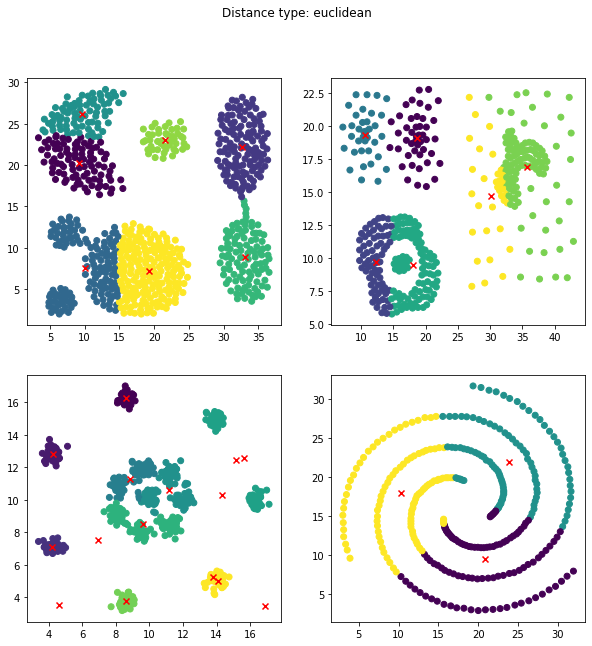

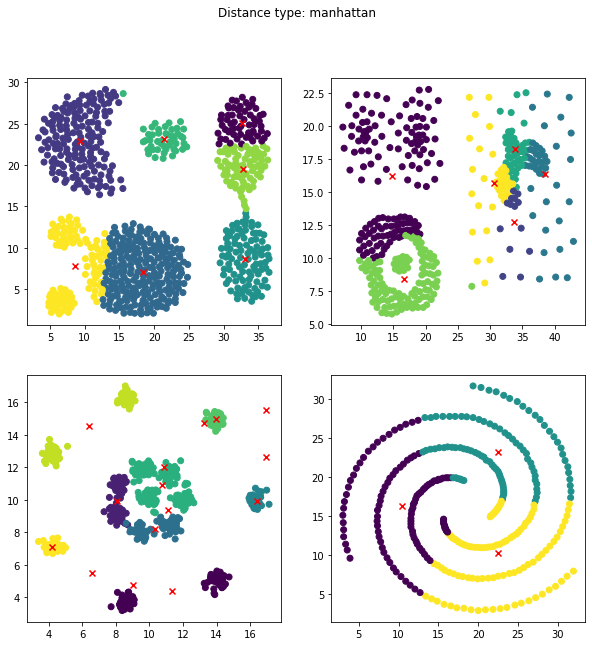

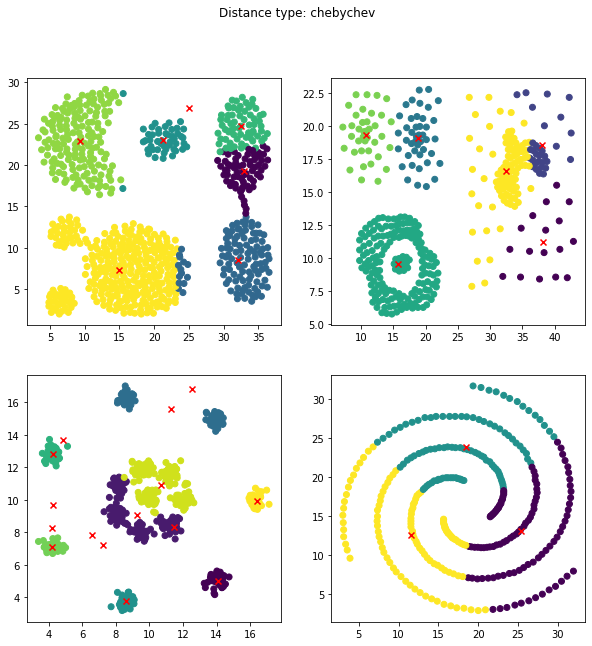

In [12]:
for dt in ['euclidean', 'manhattan', 'chebychev']:

    fig, axes = plt.subplots(2,2, figsize=[10,10])
    fig.suptitle('Distance type: %s' %dt)

    axs = axes.flatten()

    for ds in range(len(datasets)):
        labels, centroids, it = kmeans(datasets[ds], nclusters[ds], dt)
        axs[ds].scatter(datasets[ds].iloc[:,0],datasets[ds].iloc[:,1], c=labels)
        axs[ds].scatter(centroids[:,0],centroids[:,1], marker='x', color='r')




**Answer:**

`The distance type influence the result. But for the spirale data the result don't change whatever the distance type used.  `

***
### Ex. 9

Run the `kmeans` function 10 times with each distance type (in each dataset). Compute report the average and standard deviation of the number of iterations taken by the algorithm. Comment your results.

In [14]:
# TODO Write your code here
nb_iter_eucli = []
nb_iter_manhattan = []
nb_iter_chebychev = []
for iteration in range(10):
    for ds in range(len(datasets)):
        labels, centroids, it = kmeans(datasets[ds], nclusters[ds], 'euclidean')
        nb_iter_eucli.append(it)
        labels, centroids, it = kmeans(datasets[ds], nclusters[ds], 'manhattan')
        nb_iter_manhattan.append(it)
        labels, centroids, it = kmeans(datasets[ds], nclusters[ds], 'chebychev')
        nb_iter_chebychev.append(it)

print("Average iteration : \n Euclidean : ",np.mean(nb_iter_eucli)," \n Manhattan : ",np.mean(nb_iter_manhattan)," \n Chebychev : ",np.mean(nb_iter_chebychev))
print("Standard deviation : \n Euclidean : ",np.std(nb_iter_eucli)," \n Manhattan : ",np.std(nb_iter_manhattan),"\n Chebychev : ",np.std(nb_iter_chebychev))




Average iteration : 
 Euclidean :  12.9  
 Manhattan :  11.4  
 Chebychev :  11.4
Standard deviation : 
 Euclidean :  4.768647607026546  
 Manhattan :  4.305810028322197 
 Chebychev :  4.164132562731402



**Answer:**

`The number of iterations taken by the algorithm don't change that much no matter which distances is chosen. The standards deviation is also nearly the same. With this type of data the distance type don't change the average number of iteration (That can be the case with other datasets).`


***
### Ex 10

Use the `DBSCAN` method from the `sklearn.cluster` module to cluster de data. Try different values of `eps` and `min_samples`. Visualize the results making use of the function developed `plot_clusters` developed in **Ex. 6**. Discuss the following points:
1. In what way does the `eps` value influence the result of the algorithm? Does the same value work well for all datasets or it should be tuned for each dataset?
2. In what way does the `min_samples` value influence the result of the algorithm? Does the same value work well for all datasets or it should be tuned for each dataset?
3. Comment de differences in the results obtained by `DBSCAN` and `kmeans`.

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
parameters = [(2, 10),(1.5, 10),(0.8, 10),(2.5, 5)]

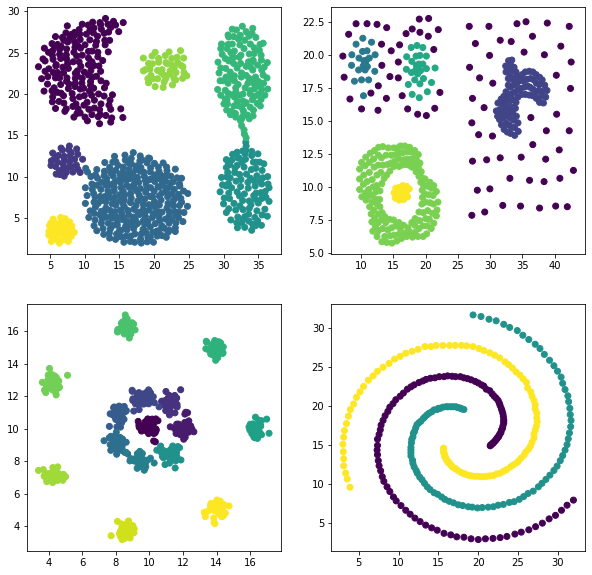

In [15]:
fig, axes = plt.subplots(2,2, figsize=[10,10])
axs = axes.flatten()

for ds in range(len(datasets)):
    current_dataset = datasets[ds]
    param = parameters[ds]
    model = DBSCAN(eps=param[0], min_samples=param[1]).fit(current_dataset)
    axs[ds].scatter(current_dataset.iloc[:,0],current_dataset.iloc[:,1], c=model.labels_)


**Answers:**

1. 
`The eps value configures the size of the neighborhood in which we are looking for data points. Different datasets require different eps values because in different data sets the distance between data points can be different. If we set a small value, then some data points can be clustered into different clusters or even can be clustered as noise even though they should belong to the same cluster. If it is too large then points which should belong to different clusters can end up in the same one. This means it is important to choose the eps value depending on the actual dataset.`

2. 
`The min samples parameter sets a minimum threshold value which tells the algorithm at least how big one cluster should be. It can be useful if we want to for example exclude noise data points. Because the relation of the data points can vary a lot through data sets it is also important to choose this parameter based on the actual dataset as well.`

3. 
`As we can see (especially on the spiral dataset) while the K-means algorithm cannot really separate the data (not linearly separable) the DBSCAN algorithm can easily do it. An other huge advantage is that the DBSCAN does not require the number of cluster before running the algorithm. On the other hand the K-means requires, which means to find the correct parameter we usually need to try different values and compare those results. The DBSCAN algorithm also correctly identified the noise points, which the K-means is not capable to do, thus those points would be attached to one cluster and spoil the result.`